In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-1m-dataset/users.dat
/kaggle/input/movielens-1m-dataset/ratings.dat
/kaggle/input/movielens-1m-dataset/README
/kaggle/input/movielens-1m-dataset/movies.dat


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
plt.style.use("default")
sns.set_context("paper", font_scale=1.2)


In [4]:
ratings = pd.read_csv(
    "/kaggle/input/movielens-1m-dataset/ratings.dat",
    sep="::",
    engine="python",
    names=["user_id", "movie_id", "rating", "timestamp"]
)

movies = pd.read_csv(
    "/kaggle/input/movielens-1m-dataset/movies.dat",
    sep="::",
    engine="python",
    names=["movie_id", "title", "genres"],
    encoding="latin-1"
)

users = pd.read_csv(
    "/kaggle/input/movielens-1m-dataset/users.dat",
    sep="::",
    engine="python",
    names=["user_id", "gender", "age", "occupation", "zip_code"]
)


In [5]:
print("Kullanıcı Sayısı:", ratings.user_id.nunique())
print("Film Sayısı:", ratings.movie_id.nunique())
print("Toplam Puanlama:", len(ratings))
print("Ortalama Puan:", ratings.rating.mean())


Kullanıcı Sayısı: 6040
Film Sayısı: 3706
Toplam Puanlama: 1000209
Ortalama Puan: 3.581564453029317


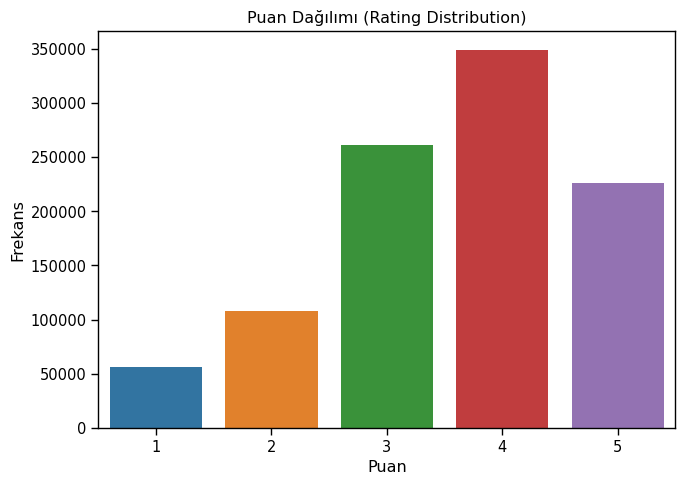

In [6]:
plt.figure(figsize=(7,5))
sns.countplot(x="rating", data=ratings)

plt.title("Puan Dağılımı (Rating Distribution)")
plt.xlabel("Puan")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()


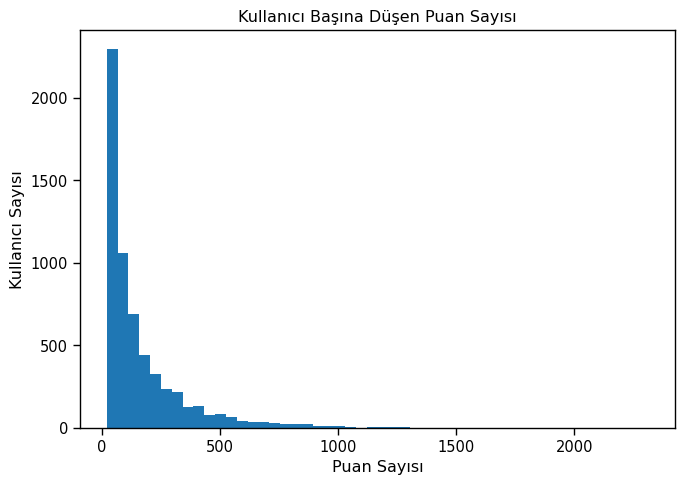

In [7]:
user_activity = ratings.groupby("user_id").size()

plt.figure(figsize=(7,5))
plt.hist(user_activity, bins=50)

plt.title("Kullanıcı Başına Düşen Puan Sayısı")
plt.xlabel("Puan Sayısı")
plt.ylabel("Kullanıcı Sayısı")
plt.tight_layout()
plt.show()


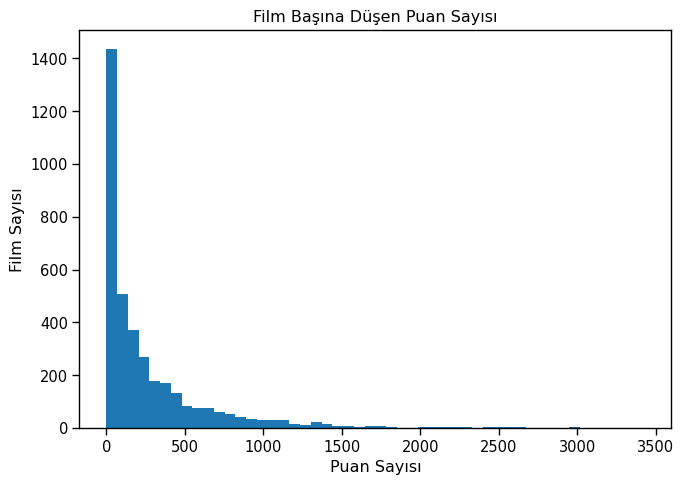

In [8]:
movie_popularity = ratings.groupby("movie_id").size()

plt.figure(figsize=(7,5))
plt.hist(movie_popularity, bins=50)

plt.title("Film Başına Düşen Puan Sayısı")
plt.xlabel("Puan Sayısı")
plt.ylabel("Film Sayısı")
plt.tight_layout()
plt.show()


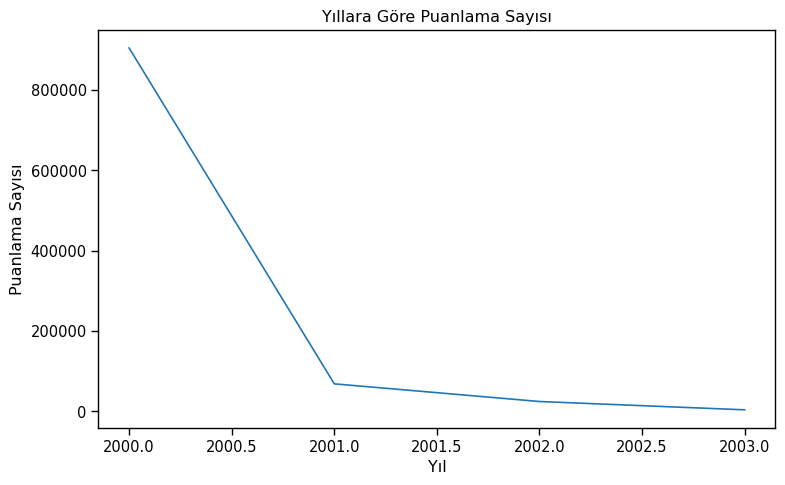

In [9]:
ratings["date"] = pd.to_datetime(ratings["timestamp"], unit="s")
ratings["year"] = ratings["date"].dt.year

ratings_per_year = ratings.groupby("year").size()

plt.figure(figsize=(8,5))
ratings_per_year.plot()

plt.title("Yıllara Göre Puanlama Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Puanlama Sayısı")
plt.tight_layout()
plt.show()


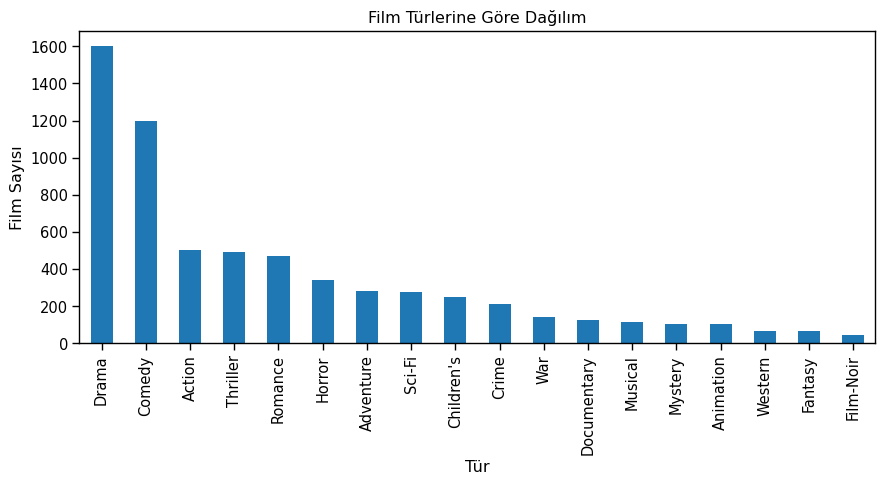

In [10]:
genre_expanded = movies["genres"].str.get_dummies("|")
genre_counts = genre_expanded.sum().sort_values(ascending=False)

plt.figure(figsize=(9,5))
genre_counts.plot(kind="bar")

plt.title("Film Türlerine Göre Dağılım")
plt.xlabel("Tür")
plt.ylabel("Film Sayısı")
plt.tight_layout()
plt.show()


In [11]:
interaction_matrix = ratings.pivot(
    index="user_id",
    columns="movie_id",
    values="rating"
)

density = interaction_matrix.count().sum() / (interaction_matrix.shape[0] * interaction_matrix.shape[1])
print(f"Etkileşim Matrisi Yoğunluğu: %{density*100:.4f}")


Etkileşim Matrisi Yoğunluğu: %4.4684


In [12]:
example_user = 1

user_ratings = ratings[ratings["user_id"] == example_user] \
    .merge(movies, on="movie_id") \
    .sort_values("rating", ascending=False)

user_ratings[["title", "genres", "rating"]].head(10)


,title,genres,rating
0,One Flew Over the Cuckoo's Nest (1975),Drama,5
46,Dumbo (1941),Animation|Children's|Musical,5
40,Toy Story (1995),Animation|Children's|Comedy,5
18,Awakenings (1990),Drama,5
41,Rain Man (1988),Drama,5
23,Schindler's List (1993),Drama|War,5
37,Cinderella (1950),Animation|Children's|Musical,5
14,"Sound of Music, The (1965)",Musical,5
25,Pocahontas (1995),Animation|Children's|Musical|Romance,5
45,Mary Poppins (1964),Children's|Comedy|Musical,5


In [14]:
movie_stats = ratings.groupby("movie_id").agg(
    rating_count=("rating", "count"),
    rating_mean=("rating", "mean")
).reset_index()

movie_stats = movie_stats.merge(movies, on="movie_id")

popular_movies = movie_stats[movie_stats["rating_count"] >= 500] \
    .sort_values("rating_mean", ascending=False) \
    .head(10)

popular_movies[["title", "rating_count", "rating_mean"]]


,title,rating_count,rating_mean
1839,Seven Samurai (The Magnificent Seven) (Shichin...,628,4.560510
309,"Shawshank Redemption, The (1994)",2227,4.554558
802,"Godfather, The (1972)",2223,4.524966
708,"Close Shave, A (1995)",657,4.520548
49,"Usual Suspects, The (1995)",1783,4.517106
513,Schindler's List (1993),2304,4.510417
1066,"Wrong Trousers, The (1993)",882,4.507937
1108,Raiders of the Lost Ark (1981),2514,4.477725
843,Rear Window (1954),1050,4.476190
253,Star Wars: Episode IV - A New Hope (1977),2991,4.453694


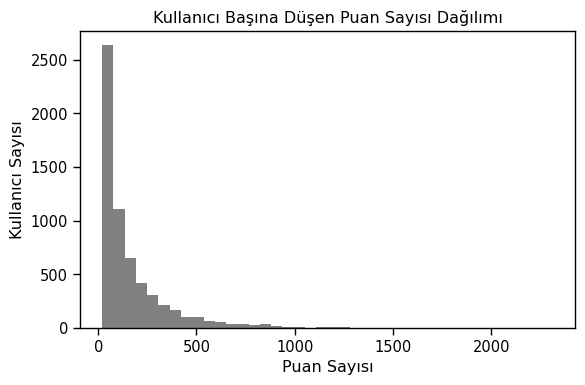

In [17]:
user_activity = ratings.groupby("user_id").size()

plt.figure(figsize=(6,4))
plt.hist(user_activity, bins=40, color="gray")

plt.xlabel("Puan Sayısı")
plt.ylabel("Kullanıcı Sayısı")

plt.tight_layout()
plt.show()


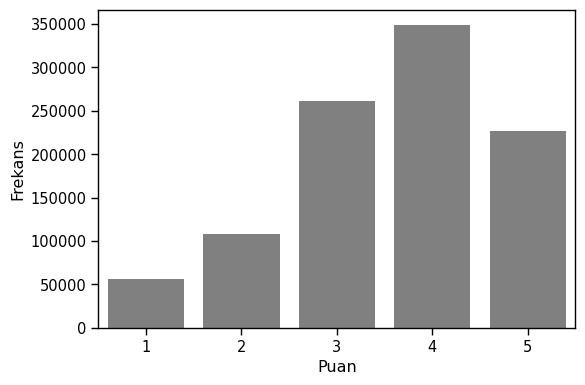

In [19]:
plt.figure(figsize=(6,4))

sns.countplot(
    x="rating",
    data=ratings,
    color="gray"
)

plt.xlabel("Puan")
plt.ylabel("Frekans")

plt.tight_layout()
plt.show()
